In [1]:
import os
import pandas as pd
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D

test_list = list(map(lambda x: 'in/'+x, os.listdir('in')))

exe = ['Sequential/LocalSearch/main', 'Sequential/SmithWaterman/main', 'Sequential/ExaustiveSearch/main', 'Sequential/BoundedExaustiveSearch/main']

class Test():
    def __init__(self, name, size_a, size_b, time):
        self.name = name
        self.size_a = size_a
        self.size_b = size_b
        self.time = time
    def __repr__(self):
        return f"{self.name=}, {self.size_a=}, {self.size_b=}, {self.time=}"
    def __str__(self):
        return f"{self.name=}, {self.size_a=}, {self.size_b=}, {self.time=}"



In [2]:
try:
    with open('test_cache.pickle', 'rb') as f:
        time_dict = pickle.load(f)
except Exception:
    time_dict = {}
    for x in exe:
        time_dict[x] = []
    progress = 0
    for i in test_list:
        for ex in exe:
            with open(i, 'r') as f:
                r = f.read()
            size_a, size_b = r.split('\n')[0:2]
            size_a = int(size_a)
            size_b = int(size_b)
            sub_list = []
            if size_a>100 or size_b>100:
                repeats = 3
            else:
                repeats = 5
            if ex == 'Sequential/ExaustiveSearch/main':
                repeats = 1
                if size_a > 100 or size_b > 100:
                    continue
            for _ in range(repeats):
                start=time.perf_counter()
                subprocess.run(['./'+ex], input=r, text=True, capture_output=True)
                end=time.perf_counter()
                sub_list.append((end-start)*1000)
                # print(f"File {ex} took {(end-start)*1000000:0.2f}us to run on input {i}")
            time_dict[ex].append(Test(i, size_a, size_b, np.mean(sub_list)))
        # print("Done with ", i)
        progress += 1
        print(f"Progresso: {progress}/{len(test_list)} ({100*progress/len(test_list):.02f})")
        with open('test_cache.pickle', 'wb') as f:
            pickle.dump(time_dict, f)

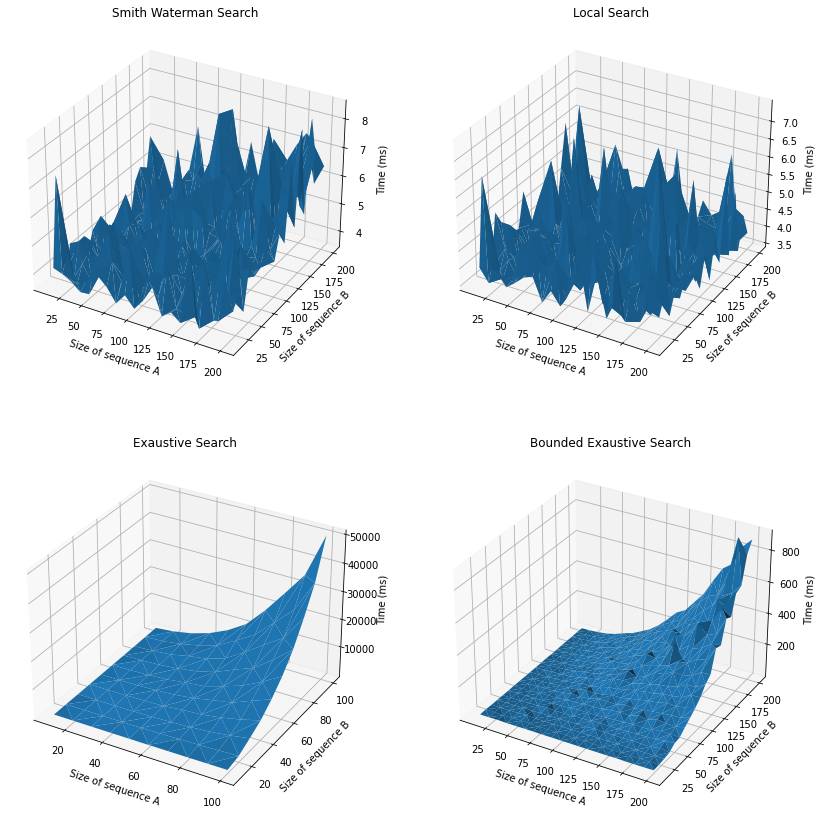

In [3]:

# Exaustive Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/ExaustiveSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
fig = plt.figure(figsize=(14,29))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'])
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Exaustive Search')


# Local Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/LocalSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_trisurf(df['size_a'], df['size_b'], df['time'])
ax2.set_xlabel('Size of sequence A')
ax2.set_ylabel('Size of sequence B')
ax2.set_zlabel('Time (ms)')
ax2.set_title('Local Search')


# SmithWaterman Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/SmithWaterman/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax3 = fig.add_subplot(221, projection='3d')
ax3.plot_trisurf(df['size_a'], df['size_b'], df['time'])
ax3.set_xlabel('Size of sequence A')
ax3.set_ylabel('Size of sequence B')
ax3.set_zlabel('Time (ms)')
ax3.set_title('Smith Waterman Search')


# Bounded Exaustive Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/BoundedExaustiveSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax4 = fig.add_subplot(122, projection='3d')
ax4.plot_trisurf(df['size_a'], df['size_b'], df['time'])
ax4.set_xlabel('Size of sequence A')
ax4.set_ylabel('Size of sequence B')
ax4.set_zlabel('Time (ms)')
ax4.set_title('Bounded Exaustive Search')


fig.show()